In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [18]:
class LeNet(nn.Module):
    
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        
        self.fc1 = nn.Linear(16*6*6,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(-1,self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self,x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *=s

        return num_features
        

In [19]:
net = LeNet()
print(net)


LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [20]:
params = list(net.parameters())
print(len(params))

10


In [21]:
input = torch.randn(1,1,32,32)
out = net(input)
print(out)

tensor([[-0.0347,  0.1190, -0.0208,  0.0304, -0.0979,  0.1426,  0.0432,  0.1269,
         -0.1138,  0.0627]], grad_fn=<AddmmBackward>)


In [24]:
net.zero_grad()
out.backward(torch.randn(1,10))

In [25]:
output = net(input)
target = torch.randn(10)
target = target.view(1,-1)
criterion = nn.MSELoss()

loss = criterion(output,target)
print(loss)



tensor(1.3267, grad_fn=<MseLossBackward>)


In [26]:
net.zero_grad()
print(net.conv1.bias.grad)
loss.backward()
print(net.conv1.bias.grad)

tensor([0., 0., 0., 0., 0., 0.])
tensor([ 0.0074, -0.0119, -0.0002,  0.0069, -0.0262,  0.0041])


In [27]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(),lr=0.01)
optimizer.zero_grad()
output = net(input)
loss = criterion(output,target)
loss.backward()
optimizer.step()



###  dataset Cifar 10

In [28]:
import torchvision
import torchvision.transforms as transforms

In [30]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ]
)

trainset = torchvision.datasets.CIFAR10(root='./data',train=True,
                                        download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,
                                          shuffle=True,num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


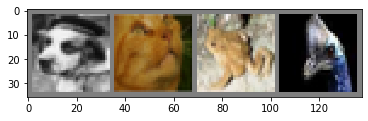

  dog   cat  frog  bird


In [35]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [56]:


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [57]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [58]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)



cuda


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [60]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data
        
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.157
[1,  4000] loss: 1.165
[1,  6000] loss: 1.181
[1,  8000] loss: 1.185
[1, 10000] loss: 1.161
[1, 12000] loss: 1.168
[2,  2000] loss: 1.074
[2,  4000] loss: 1.080
[2,  6000] loss: 1.071
[2,  8000] loss: 1.107
[2, 10000] loss: 1.066
[2, 12000] loss: 1.075
[3,  2000] loss: 1.003
[3,  4000] loss: 1.019
[3,  6000] loss: 1.021
[3,  8000] loss: 1.021
[3, 10000] loss: 1.007
[3, 12000] loss: 1.027
[4,  2000] loss: 0.946
[4,  4000] loss: 0.955
[4,  6000] loss: 0.970
[4,  8000] loss: 0.956
[4, 10000] loss: 0.982
[4, 12000] loss: 0.987
[5,  2000] loss: 0.893
[5,  4000] loss: 0.914
[5,  6000] loss: 0.931
[5,  8000] loss: 0.917
[5, 10000] loss: 0.920
[5, 12000] loss: 0.952
[6,  2000] loss: 0.833
[6,  4000] loss: 0.874
[6,  6000] loss: 0.892
[6,  8000] loss: 0.889
[6, 10000] loss: 0.892
[6, 12000] loss: 0.911
[7,  2000] loss: 0.813
[7,  4000] loss: 0.815
[7,  6000] loss: 0.862
[7,  8000] loss: 0.861
[7, 10000] loss: 0.882
[7, 12000] loss: 0.868
[8,  2000] loss: 0.771
[8,  4000] 

In [61]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(),PATH)

###  Test

In [62]:
net = Net()
net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [63]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %
